Q1: What is Estimation Statistics? Explain point estimate and interval estimate.

### Estimation Statistics

**Estimation statistics** is a branch of statistics that involves estimating population parameters based on sample data.

1. **Point Estimate**: A single value given as the estimate of a population parameter (e.g., the sample mean as an estimate of the population mean).

2. **Interval Estimate**: A range of values, defined by a lower and upper bound, within which the population parameter is expected to lie, often accompanied by a confidence level (e.g., a 95% confidence interval for the population mean).


Q2. Write a Python function to estimate the population mean using a sample mean and standard
deviation.

In [2]:
import numpy as np
import scipy.stats as stats

def estimate_population_mean(sample_data, confidence_level=0.95):
    
    # Calculate sample mean and standard deviation
    sample_mean = np.mean(sample_data)
    sample_std = np.std(sample_data, ddof=1)
    
    # Calculate the margin of error
    sample_size = len(sample_data)
    t_value = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1)
    margin_of_error = t_value * (sample_std / np.sqrt(sample_size))
    
    # Calculate confidence interval
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    
    return sample_mean, (lower_bound, upper_bound)

# Example usage
sample_data = [10, 12, 13, 12, 11, 14, 15, 12, 11, 10]
point_estimate, interval_estimate = estimate_population_mean(sample_data)
print(f"Point Estimate: {point_estimate}")
print(f"Interval Estimate: {interval_estimate}")


Point Estimate: 12.0
Interval Estimate: (10.831827064234968, 13.168172935765032)


Q3: What is Hypothesis testing? Why is it used? State the importance of Hypothesis testing.

In [4]:
import numpy as np
from scipy import stats

def hypothesis_test_two_means(sample1, sample2, alpha=0.05):
    """
    Conducts a hypothesis test on the difference between two population means.

    Parameters:
    - sample1: list or numpy array of sample observations from population 1
    - sample2: list or numpy array of sample observations from population 2
    - alpha: significance level (default is 0.05)

    Returns:
    - t_statistic: the calculated t statistic
    - p_value: the p-value of the test
    - result: whether to reject the null hypothesis (True or False)
    """
    # Calculate sample means and standard deviations
    mean1, mean2 = np.mean(sample1), np.mean(sample2)
    std1, std2 = np.std(sample1, ddof=1), np.std(sample2, ddof=1)
    n1, n2 = len(sample1), len(sample2)
    
    # Calculate the pooled standard deviation
    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
    
    # Calculate the t statistic
    t_statistic = (mean1 - mean2) / (pooled_std * np.sqrt(1/n1 + 1/n2))
    
    # Calculate the degrees of freedom
    df = n1 + n2 - 2
    
    # Calculate the p-value
    p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=df))
    
    # Determine whether to reject the null hypothesis
    result = p_value < alpha
    
    return t_statistic, p_value, result

# Example usage
sample1 = [10, 12, 13, 12, 11, 14, 15, 12, 11, 10]
sample2 = [14, 15, 16, 15, 14, 16, 17, 15, 14, 13]
t_statistic, p_value, result = hypothesis_test_two_means(sample1, sample2)
print(f"T Statistic: {t_statistic}")
print(f"P Value: {p_value}")
print(f"Reject Null Hypothesis: {result}")


T Statistic: -4.529039094769577
P Value: 0.0002598216032014822
Reject Null Hypothesis: True


Q6: What is a null and alternative hypothesis? Give some examples.

Null hypothesis is the baseline assumption that we are starting our analysis with.

Alternate hypothesis is prooving the null hypothesis wrong in either way by denying it or bringing out some other result.

Q7: Write down the steps involved in hypothesis testing.

- stating null hypothesis 
- stating alternate hypothesis
- statistical analysis using different test
- accepting or rejecting null hypothesis

Q8. Define p-value and explain its significance in hypothesis testing.

### P-Value

**P-value**:
- The p-value is the probability of obtaining test results at least as extreme as the observed results, assuming that the null hypothesis (\(H_0\)) is true.

**Significance in Hypothesis Testing**:
- **Interpreting the P-Value**:
  - **Low P-value (\(< \alpha\))**: Indicates strong evidence against the null hypothesis, leading to its rejection.
  - **High P-value (\(\geq \alpha\))**: Indicates weak evidence against the null hypothesis, leading to its acceptance.
- **Threshold (\(\alpha\))**: A significance level (e.g., 0.05) used to decide whether the p-value is low enough to reject the null hypothesis.
- **Conclusion**: The p-value helps determine whether observed data are consistent with the null hypothesis or if there is evidence to support the alternative hypothesis.


Q9. Generate a Student's t-distribution plot using Python's matplotlib library, with the degrees of freedom
parameter set to 10.

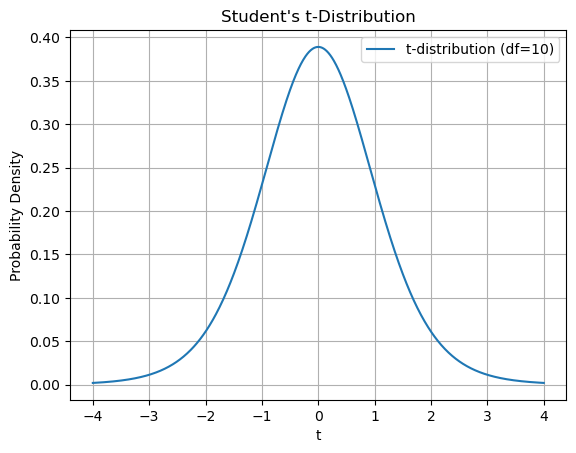

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set the degrees of freedom
df = 10

# Generate x values
x = np.linspace(-4, 4, 1000)

# Calculate the t-distribution values
y = stats.t.pdf(x, df)

# Plot the t-distribution
plt.plot(x, y, label=f't-distribution (df={df})')

# Add title and labels
plt.title("Student's t-Distribution")
plt.xlabel('t')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


Q10. Write a Python program to calculate the two-sample t-test for independent samples, given two
random samples of equal size and a null hypothesis that the population means are equal.

In [13]:
import numpy as np
from scipy import stats

def two_sample_t_test(sample1, sample2, alpha=0.05):
    """
    Conducts a two-sample t-test for independent samples.

    Parameters:
    - sample1: list or numpy array of sample observations from population 1
    - sample2: list or numpy array of sample observations from population 2
    - alpha: significance level (default is 0.05)

    Returns:
    - t_statistic: the calculated t statistic
    - p_value: the p-value of the test
    - result: whether to reject the null hypothesis (True or False)
    """
    # Calculate the means and standard deviations
    mean1, mean2 = np.mean(sample1), np.mean(sample2)
    std1, std2 = np.std(sample1, ddof=1), np.std(sample2, ddof=1)
    n1, n2 = len(sample1), len(sample2)
    
    # Calculate the pooled standard deviation
    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
    
    # Calculate the t statistic
    t_statistic = (mean1 - mean2) / (pooled_std * np.sqrt(1/n1 + 1/n2))
    
    # Calculate the degrees of freedom
    df = n1 + n2 - 2
    
    # Calculate the p-value
    p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=df))
    
    # Determine whether to reject the null hypothesis
    result = p_value < alpha
    
    return t_statistic, p_value, result

# Example usage
np.random.seed(42)  # For reproducibility

# Generate two random samples of equal size
sample1 = np.random.normal(loc=50, scale=5, size=30)
sample2 = np.random.normal(loc=52, scale=5, size=30)

# Perform the two-sample t-test
t_statistic, p_value, result = two_sample_t_test(sample1, sample2)
print(f"T Statistic: {t_statistic}")
print(f"P Value: {p_value}")
print(f"Reject Null Hypothesis: {result}")


T Statistic: -1.9751555355027917
P Value: 0.053016255381014954
Reject Null Hypothesis: False


Q11: What is Student’s t distribution? When to use the t-Distribution.

### Student's t-Distribution

**Student's t-distribution** is a probability distribution that is symmetric and bell-shaped, similar to the normal distribution but with heavier tails. It is used when the sample size is small and the population standard deviation is unknown.

### When to Use the t-Distribution

- **Small Sample Sizes**: When the sample size is less than 30.
- **Unknown Population Standard Deviation**: When the standard deviation of the population is not known.
- **Estimating Population Parameters**: When making inferences about a population mean from a small sample.
- **Hypothesis Testing**: For testing the means of one or two samples (e.g., one-sample t-test, two-sample t-test).

### Key Points

- **Shape**: Similar to the normal distribution but with thicker tails.
- **Degrees of Freedom (df)**: The shape depends on the degrees of freedom; more df make it closer to the normal distribution.

In summary, the t-distribution is used primarily for hypothesis testing and confidence intervals when dealing with small sample sizes and unknown population standard deviations.


Q12: What is t-statistic? State the formula for t-statistic.

### T-Statistic

**T-statistic** is a value used in hypothesis testing to determine if there is a significant difference between the sample mean and the population mean, or between the means of two samples.

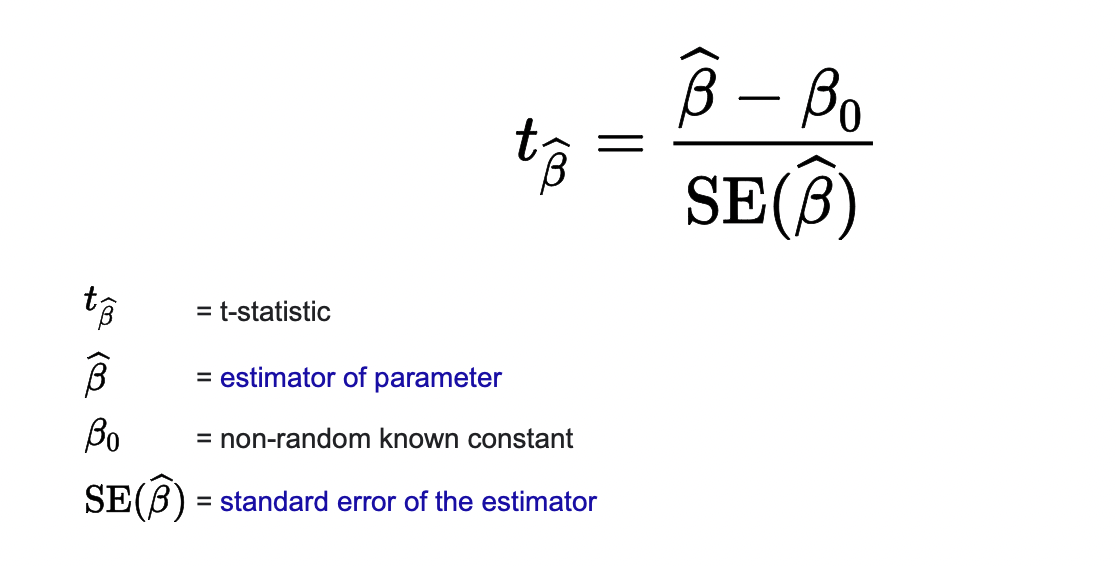

Q13. A coffee shop owner wants to estimate the average daily revenue for their shop. They take a random
sample of 50 days and find the sample mean revenue to be $500 with a standard deviation of $50.
Estimate the population mean revenue with a 95% confidence interval.

### Estimating the Population Mean Revenue with a 95% Confidence Interval

Given:
- Sample size (n) = 50
- Sample mean (x̄) = $500
- Sample standard deviation (s) = $50
- Confidence level = 95%

### Step-by-Step Calculation

1. **Calculate the Standard Error (SE)**:
   \[
   SE = \frac{s}{\sqrt{n}} = \frac{50}{\sqrt{50}} \approx 7.071
   \]

2. **Determine the t-value for 95% Confidence Interval**:
   - Degrees of freedom (df) = n - 1 = 50 - 1 = 49
   - For a 95% confidence level and 49 degrees of freedom, the t-value (t) can be found using a t-table or statistical software. Approximately t ≈ 2.0096.

3. **Calculate the Margin of Error (ME)**:
   \[
   ME = t \times SE = 2.0096 \times 7.071 \approx 14.2
   \]

4. **Construct the Confidence Interval**:
   \[
   \text{Lower bound} = x̄ - ME = 500 - 14.2 = 485.8
   \]
   \[
   \text{Upper bound} = x̄ + ME = 500 + 14.2 = 514.2
   \]

### Conclusion

The 95% confidence interval for the population mean revenue is approximately $485.80 to $514.20.


Q14. A researcher hypothesizes that a new drug will decrease blood pressure by 10 mmHg. They conduct a
clinical trial with 100 patients and find that the sample mean decrease in blood pressure is 8 mmHg with a
standard deviation of 3 mmHg. Test the hypothesis with a significance level of 0.05.

### Hypothesis Testing for a New Drug's Effect on Blood Pressure

**Given:**
- Population mean decrease under null hypothesis (\( \mu_0 \)) = 10 mmHg
- Sample size (\( n \)) = 100
- Sample mean decrease (\( \bar{x} \)) = 8 mmHg
- Sample standard deviation (\( s \)) = 3 mmHg
- Significance level (\( \alpha \)) = 0.05

### Step-by-Step Calculation

1. **State the Hypotheses**:
   - Null hypothesis (\( H_0 \)): \( \mu = 10 \) mmHg
   - Alternative hypothesis (\( H_1 \)): \( \mu \neq 10 \) mmHg

2. **Calculate the Standard Error (SE)**:
   \[
   SE = \frac{s}{\sqrt{n}} = \frac{3}{\sqrt{100}} = \frac{3}{10} = 0.3
   \]

3. **Calculate the Test Statistic (t)**:
   \[
   t = \frac{\bar{x} - \mu_0}{SE} = \frac{8 - 10}{0.3} = \frac{-2}{0.3} = -6.67
   \]

4. **Determine the Critical t-value**:
   - Degrees of freedom (df) = \( n - 1 = 100 - 1 = 99 \)
   - For a two-tailed test at \( \alpha = 0.05 \), the critical t-value (using a t-table or statistical software) is approximately \( \pm 1.984 \).

5. **Compare the Test Statistic with the Critical Value**:
   - The calculated t-value is -6.67.
   - Since -6.67 is less than -1.984, it falls in the rejection region.

6. **Make a Decision**:
   - Reject the null hypothesis (\( H_0 \)).

### Conclusion

There is sufficient evidence at the 0.05 significance level to reject the null hypothesis. This suggests that the new drug significantly decreases blood pressure by a different amount than 10 mmHg.


Q15. An electronics company produces a certain type of product with a mean weight of 5 pounds and a
standard deviation of 0.5 pounds. A random sample of 25 products is taken, and the sample mean weight
is found to be 4.8 pounds. Test the hypothesis that the true mean weight of the products is less than 5
pounds with a significance level of 0.01.

### Hypothesis Testing for Product Weight

**Given:**
- Population mean (\( \mu_0 \)) = 5 pounds
- Population standard deviation (\( \sigma \)) = 0.5 pounds
- Sample size (\( n \)) = 25
- Sample mean (\( \bar{x} \)) = 4.8 pounds
- Significance level (\( \alpha \)) = 0.01

### Step-by-Step Calculation

1. **State the Hypotheses**:
   - Null hypothesis (\( H_0 \)): \( \mu \geq 5 \) pounds
   - Alternative hypothesis (\( H_1 \)): \( \mu < 5 \) pounds

2. **Calculate the Standard Error (SE)**:
   \[
   SE = \frac{\sigma}{\sqrt{n}} = \frac{0.5}{\sqrt{25}} = \frac{0.5}{5} = 0.1
   \]

3. **Calculate the Test Statistic (z)**:
   \[
   z = \frac{\bar{x} - \mu_0}{SE} = \frac{4.8 - 5}{0.1} = \frac{-0.2}{0.1} = -2
   \]

4. **Determine the Critical z-value**:
   - For a one-tailed test at \( \alpha = 0.01 \), the critical z-value (using a z-table) is approximately -2.33.

5. **Compare the Test Statistic with the Critical Value**:
   - The calculated z-value is -2.
   - Since -2 is greater than -2.33, it does not fall in the rejection region.

6. **Make a Decision**:
   - Fail to reject the null hypothesis (\( H_0 \)).

### Conclusion

There is not sufficient evidence at the 0.01 significance level to reject the null hypothesis. This suggests that the true mean weight of the products is not significantly less than 5 pounds.


Q16. Two groups of students are given different study materials to prepare for a test. The first group (n1 =
30) has a mean score of 80 with a standard deviation of 10, and the second group (n2 = 40) has a mean
score of 75 with a standard deviation of 8. Test the hypothesis that the population means for the two
groups are equal with a significance level of 0.01.


### Hypothesis Testing for Equality of Means for Two Independent Groups

**Given:**
- Group 1: \( n_1 = 30 \), \( \bar{x}_1 = 80 \), \( s_1 = 10 \)
- Group 2: \( n_2 = 40 \), \( \bar{x}_2 = 75 \), \( s_2 = 8 \)
- Significance level (\( \alpha \)) = 0.01

### Step-by-Step Calculation

1. **State the Hypotheses**:
   - Null hypothesis (\( H_0 \)): \( \mu_1 = \mu_2 \)
   - Alternative hypothesis (\( H_1 \)): \( \mu_1 \neq \mu_2 \)

2. **Calculate the Pooled Standard Deviation ( \( s_p \))**:
   \[
   s_p = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}}
   \]
   \[
   s_p = \sqrt{\frac{(30 - 1) \cdot 10^2 + (40 - 1) \cdot 8^2}{30 + 40 - 2}}
   \]
   \[
   s_p = \sqrt{\frac{29 \cdot 100 + 39 \cdot 64}{68}}
   \]
   \[
   s_p = \sqrt{\frac{2900 + 2496}{68}} = \sqrt{\frac{5396}{68}} \approx \sqrt{79.35} \approx 8.9
   \]

3. **Calculate the Standard Error (SE)**:
   \[
   SE = s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}} = 8.9 \sqrt{\frac{1}{30} + \frac{1}{40}} \approx 8.9 \sqrt{0.0333 + 0.025} \approx 8.9 \sqrt{0.0583} \approx 8.9 \cdot 0.241 \approx 2.14
   \]

4. **Calculate the Test Statistic (t)**:
   \[
   t = \frac{\bar{x}_1 - \bar{x}_2}{SE} = \frac{80 - 75}{2.14} \approx \frac{5}{2.14} \approx 2.34
   \]

5. **Determine the Critical t-value**:
   - Degrees of freedom (df) = \( n_1 + n_2 - 2 = 30 + 40 - 2 = 68 \)
   - For a two-tailed test at \( \alpha = 0.01 \), the critical t-value can be found using a t-table or statistical software. Approximately \( t_{0.005, 68} \approx \pm 2.65 \).

6. **Compare the Test Statistic with the Critical Value**:
   - The calculated t-value is 2.34.
   - Since 2.34 is less than 2.65, it does not fall in the rejection region.

7. **Make a Decision**:
   - Fail to reject the null hypothesis (\( H_0 \)).

### Conclusion

There is not sufficient evidence at the 0.01 significance level to reject the null hypothesis. This suggests that the population means for the two groups are not significantly different.


Q17. A marketing company wants to estimate the average number of ads watched by viewers during a TV
program. They take a random sample of 50 viewers and find that the sample mean is 4 with a standard
deviation of 1.5. Estimate the population mean with a 99% confidence interval.

### Estimating the Population Mean Number of Ads Watched with a 99% Confidence Interval

**Given:**
- Sample size (\(n\)) = 50
- Sample mean (\(\bar{x}\)) = 4 ads
- Sample standard deviation (\(s\)) = 1.5 ads
- Confidence level = 99%

### Step-by-Step Calculation

1. **Calculate the Standard Error (SE)**:
   \[
   SE = \frac{s}{\sqrt{n}} = \frac{1.5}{\sqrt{50}} = \frac{1.5}{7.071} \approx 0.212
   \]

2. **Determine the t-value for 99% Confidence Interval**:
   - Degrees of freedom (\(df\)) = \(n - 1 = 50 - 1 = 49\)
   - For a 99% confidence level and 49 degrees of freedom, the t-value (\(t_{\alpha/2}\)) can be found using a t-table or statistical software. Approximately \(t_{0.005, 49} \approx 2.68\).

3. **Calculate the Margin of Error (ME)**:
   \[
   ME = t_{\alpha/2} \times SE = 2.68 \times 0.212 \approx 0.568
   \]

4. **Construct the Confidence Interval**:
   \[
   \text{Lower bound} = \bar{x} - ME = 4 - 0.568 = 3.432
   \]
   \[
   \text{Upper bound} = \bar{x} + ME = 4 + 0.568 = 4.568
   \]

### Conclusion

The 99% confidence interval for the population mean number of ads watched is approximately 3.432 to 4.568 ads.
